In [2]:
from matplotlib.colors import ListedColormap
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import random

In [4]:
def make_table(rule):
    """
    Make the table for a given CA rule.

    Args:
      rule: int, the rule of the CA to be used (0-255)

    Returns:
      array of 8 0s and 1s
    """
    rule = np.array([rule], dtype=np.uint8)
    table = np.unpackbits(rule)[::-1]
    return table

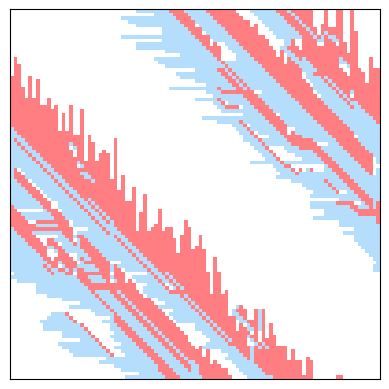

In [20]:
cmap = ListedColormap(['white', '#95d0fc', '#ff474c'])
class BML:
    def __init__(self, rule, n, m):
        self.array = np.zeros((n, m), dtype=np.int8)
        self.table = make_table(rule)
        self.n = n
        self.m = m

    def start_single(self):
        self.array[0, self.m//2] = 1
        self.array[0, self.m//2 +1] = 2
        self.array[self.n//2, 0] = 2

    def start_density(self, density):
        for i in range(len(self.array)):
            for j in range(len(self.array[i])):
                self.array[i][j] = np.random.choice([0,1,2], p=[1-density, density/2, density/2])
        print(self.array)

    def step(self):
        """
        Currently not sure how to make this work so it only moves 1 kind of cell
        """
        for i, row in enumerate(self.array):
            window = [4, 2, 1]
            c = np.correlate(row, window, mode='same')
            self.array[i] = self.table[c]

    def step_blue(self):
        """
        Currently not sure how to make this work so it only moves 1 kind of cell
        """
        for row in self.array:
            cell_0 = row[0]
            i = 0
            while i  < len(row):
                if i == len(row) - 1:
                    if row[i] == 1 and cell_0 == 0:
                        row[i] = 0
                        row[0] = 1
                    break
                else:
                    if row[i] == 1 and row[i+1] == 0:
                        row[i] = 0
                        row[i+1] = 1
                        i += 2
                    else:
                      i+=1

    def step_red(self):
        """
        Currently not sure how to make this work so it only moves 1 kind of cell
        """
        self.array = self.array.T
        for row in self.array:
            cell_0 = row[0]
            i = 0
            while i  < len(row):
                if i == len(row) - 1:
                    if row[i] == 2 and cell_0 == 0:
                        row[i] = 0
                        row[0] = 2
                    break
                else:
                    if row[i] == 2 and row[i+1] == 0:
                        row[i] = 0
                        row[i+1] = 2
                        i += 2
                    else:
                      i+=1
        self.array = self.array.T

    def loop(self, steps=1):
        for _ in range(steps):
            self.step_blue()
            self.step_red()

    def animate(self, frames=1, interval=None):
        plt.figure()
        try:
            for i in range(frames-1):
                self.draw()
                plt.show()
                if interval:
                    sleep(interval)
                self.loop()
                clear_output(wait=True)
            self.draw()
            plt.show()
        except KeyboardInterrupt:
            pass


    def draw(self, start=0, end=None):
      a = self.array[:, start:end]
      plt.imshow(a, cmap=cmap, alpha=0.7)

      # turn off axis tick marks
      plt.xticks([])
      plt.yticks([])




bml = BML(184,100, 100)
bml.start_density(0.5)
bml.animate(frames=1000)